## Movie Data Analysis

<br>

#### This file is a culmination of multiple projects and assignments completed whilst  undertaking my course 'Data Analysis with Python', offered by the University of Pennsylvania. It is centered around analyzing movie data taken from IMDB.
<br> 

**The project features a multiplicity of data analysis methods and techniques, utilizing a variety of Python libraries, which were applied  in a series of different assignments required by the course. These include techniques for inspecting, querying, and analyzing Excel files (parts 1 & 2), grouping and statistically summarizing data (part 3), and visualization data (part 4).** <br>
<br>

**The data being analyzed here are taken from imdb.com, comprising a list of movies and their relevant details (e.g., year of release, director name, etc.), as collected and arranged by imdb.** <br>
<br>
**All the data are contained within the file “imdb.xlsx”, which consists of 3 sheets (with the following coloumns):**
 * **imdb:** *'movie_title', 'director_id', 'country_id', 'content_rating', 'title_year', 'imdb_score', 'gross', 'duration'*
 * **countries:** *'id', 'country'*
 * **directors:** *'id', 'director_name'*
<br>
<br>

In [1]:
#Importing the Python modules to be used 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter("ignore")

### Part One: Loading and Inspecting Data

**1. Loading and Reading Excel file**

In [2]:
#Accessing the 'imdb.xlsx' file
xl = pd.ExcelFile('imdb.xlsx')

#Loading each sheet onto a separate dataframe 
df = xl.parse('imdb')
df_countries = xl.parse('countries')
df_directors = xl.parse('directors')


**2. General Inspections of the File** 

In [3]:
#Inspecting the shape (rows x coloumns) of first sheet

shape = df.shape
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0])


Number of coloumns: 8
Number of rows: 178


In [4]:
#Inspecting the coloumn headers of the first sheet

print('Coloumn headers in the sheet \'imdb\':')
for column in list(df.columns):
    print(column)


Coloumn headers in the sheet 'imdb':
movie_title
director_id
country_id
content_rating
title_year
imdb_score
gross
duration


In [5]:
#Display the first 10 rows of data in the sheet 'imdb'

print('The first 10 enteries off the \'imdb\' sheet:')
df.head(10)


The first 10 enteries off the 'imdb' sheet:


,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142
1,The GodfatherÊ,33,1,R,1972,9.2,134821952,175
2,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152
3,The Godfather: Part IIÊ,33,1,R,1974,9.0,57300000,220
4,The Lord of the Rings: The Return of the KingÊ,83,1,PG-13,2003,8.9,377019252,192
5,Pulp FictionÊ,85,1,R,1994,8.9,107930000,178
6,"The Good, the Bad and the UglyÊ",98,2,Approved,1966,8.9,6100000,142
7,Schindler's ListÊ,103,1,R,1993,8.9,96067179,185
8,InceptionÊ,16,1,PG-13,2010,8.8,292568851,148
9,Fight ClubÊ,22,1,R,1999,8.8,37023395,151


### Part Two: Data Merging, Updating, & Querying

**1. Merging Data**

In [6]:
#Joining the three dataframes: df, df_countries, and df_directors (with an 'inner' join)
#Merging dataframe df with df_directors
df = pd.merge(left=df,
              right=df_directors,
              how='inner',
              left_on='director_id',
              right_on='id')

#Merging dataframe df with df_countries
df = pd.merge(left=df,
              right=df_countries,
              how='inner',
              left_on='country_id',
              right_on='id')

#removing unnecessary columns
del df['id_x']
del df['id_y']

#removing duplicate items (in case merging resulted in duplication)
df = df.drop_duplicates().reset_index(drop=True)

#Rearranging the coloumns order
rearranged_coloumns = ['movie_title', 'title_year', 'imdb_score', 'duration', 'gross', 'content_rating',
                       'director_name', 'director_id', 'country', 'country_id']
df = df.reindex(columns=rearranged_coloumns)


#printing the first 5 enteries to see data after merging and updating 
df.head()


,movie_title,title_year,imdb_score,duration,gross,content_rating,director_name,director_id,country,country_id
0,The Shawshank RedemptionÊ,1994,9.3,142,28341469,R,Frank Darabont,34,USA,1
1,The Green MileÊ,1999,8.5,189,136801374,R,Frank Darabont,34,USA,1
2,The GodfatherÊ,1972,9.2,175,134821952,R,Francis Ford Coppola,33,USA,1
3,The Godfather: Part IIÊ,1974,9.0,220,57300000,R,Francis Ford Coppola,33,USA,1
4,Apocalypse NowÊ,1979,8.5,289,78800000,R,Francis Ford Coppola,33,USA,1


**2. Display the  first ten rows in the coloumn 'movie title'**

In [7]:
#storing the first 10 enteries off 'movie_title' into a dataframe 
first10_titles = df['movie_title'].head(10)
#displaying the results 
print('first 10 movies on the list:') 
first10_titles


first 10 movies on the list:


0    The Shawshank RedemptionÊ
1              The Green MileÊ
2               The GodfatherÊ
3      The Godfather: Part IIÊ
4              Apocalypse NowÊ
5             The Dark KnightÊ
6                   InceptionÊ
7                InterstellarÊ
8                     MementoÊ
9                The PrestigeÊ
Name: movie_title, dtype: object

**2.2. Remove the extra character at the end of each movie title and report the first ten movie titles again**

In [8]:
#traversing the 'movie_title' coloumn to remove the extra character from each row
df['movie_title'] = df['movie_title'].str.replace('Ê', '')

#displaying the first 10 movie titles
print('First 10 movies titles after fixing:')
df['movie_title'].head(10)


First 10 movies titles after fixing:


0    The Shawshank Redemption
1              The Green Mile
2               The Godfather
3      The Godfather: Part II
4              Apocalypse Now
5             The Dark Knight
6                   Inception
7                Interstellar
8                     Memento
9                The Prestige
Name: movie_title, dtype: object

##### Data Querying


**3. Who is the director with the most movies?**

In [9]:
#reporting the frequency of directors listed 
director_freq = df['director_name'].value_counts()      
print('The director most featured and the frequency:\n', director_freq.head(1))


The director most featured and the frequency:
 Christopher Nolan    7
Name: director_name, dtype: int64


**4. Report all of this director's movies and their movie rating scores**

In [10]:
#get the first entry in 'director_freq'
most_featured = director_freq.head(1)
#get the director's name 
most_featured = most_featured.index[0] 

#filtering dataframe by the director name
director_filter = df['director_name'] == most_featured
all_movies_ratings = df[director_filter][['movie_title', 'imdb_score']]  
all_movies_ratings.reset_index(inplace=True) 

#reporting the most featured director's movies
print('{}\'s movies and their imdb ratings are as follows:'.format(most_featured))
all_movies_ratings


Christopher Nolan's movies and their imdb ratings are as follows:


,index,movie_title,imdb_score
0,5,The Dark Knight,9.0
1,6,Inception,8.8
2,7,Interstellar,8.6
3,8,Memento,8.5
4,9,The Prestige,8.5
5,10,The Dark Knight Rises,8.5
6,11,Batman Begins,8.3


**5. Recommend a random movie that has a rating of 8.5 or above. Report the title and imdb score of your recommendation.**


In [11]:
#filtering dataframe by rating score
RatingFilter = df['imdb_score'] >= 8.5     
df_TopMovies = df[RatingFilter]

#Reporting a random movie (via a randomly generated index)
import random
random_index = random.randint(0, len(df_TopMovies) - 1)         #get a random index
random_movie = df_TopMovies[random_index: random_index+1]         #select movie by random index
random_movie = random_movie[['movie_title', 'imdb_score']]        #get the movie title and rating score only 
print('Here is your recommendation of a highly rated movie:')
random_movie



Here is your recommendation of a highly rated movie:


,movie_title,imdb_score
6,Inception,8.8


### Part Three: Grouping and Summarizing Data (statistical analysis)

**1. Get the summary statistics (mean, std, percentile, etc.) for movies rating scores and gross amount**

In [12]:
pd.options.display.float_format = '{:.2f}'.format          #to display numeric values in full without converting them to float
score_gross_description = df[['imdb_score', 'gross']].describe()
print('This table provides summary statistics for movies rating scores and gross amounts:')
score_gross_description


This table provides summary statistics for movies rating scores and gross amounts:


,imdb_score,gross
count,178.00,178.00
mean,8.29,103040175.47
std,0.27,124254876.24
min,8.00,8060.00
25%,8.10,13185097.00
50%,8.20,51943707.00
75%,8.47,152243552.50
max,9.30,623279547.00


**2. What is the average score rating of the director Christopher Nolan's movies?**

In [13]:
#Filtering by director name, 'Christopher Nolan'
chris_nolan = df['director_name'] == 'Christopher Nolan'
nolan_mean = df[chris_nolan]['imdb_score'].mean()
print('The average rating score of a Christopher Nolan movie is:', nolan_mean)



The average rating score of a Christopher Nolan movie is: 8.6


**3. What is the average score rating for each director featured?**

In [14]:
#Grouping directors by name and reporting the mean rating for each
directors = df.groupby('director_name').agg([np.mean])['imdb_score']
print('The following table lists each director featured and their average rating score:')
directors


The following table lists each director featured and their average rating score:


,mean
director_name,
Akira Kurosawa,8.70
Alejandro Amenabar,8.10
Alejandro G. Inarritu,8.10
Alfred Hitchcock,8.50
Andrew Stanton,8.30
...,...
Victor Fleming,8.15
Vincent Paronnaud,8.00
Wes Anderson,8.10


**Sort the list from director with the highest mean rating to director with the least mean rating**

In [15]:
#Sorting 'directors' by mean rating score (from highest to lowest)
directors_sorted = directors.sort_values('mean', ascending=False)
print('Directors and their average rating score from the highest to lowest:')
directors_sorted


Directors and their average rating score from the highest to lowest:


,mean
director_name,
Frank Darabont,8.90
Francis Ford Coppola,8.90
Irvin Kershner,8.80
Peter Jackson,8.80
Fernando Meirelles,8.70
...,...
Lars von Trier,8.00
Karan Johar,8.00
Stephen Chbosky,8.00


**Report the director with the highest average rating score**

In [16]:
print('Director with the highest average rating score is:', directors_sorted.index[0])


Director with the highest average rating score is: Frank Darabont


**4.Report the non-USA movies directed by Hayao Miyazaki and released after 1960**

In [17]:
#Filtering data by country (id), release year, and director name
foreign_movies = df['country_id'] != 1
year_filter = df['title_year'] > 1960
director_filter = df['director_name'] == 'Hayao Miyazaki'

#Reporting non-USA movies made after 1960 by Hayao Miyazaki
miyazaki = df[foreign_movies & year_filter & director_filter]
print('Movies directed by Hayao Miyazaki after 1960:')
miyazaki


Movies directed by Hayao Miyazaki after 1960:


,movie_title,title_year,imdb_score,duration,gross,content_rating,director_name,director_id,country,country_id
128,Spirited Away,2001,8.60,125,10049886,PG,Hayao Miyazaki,46,Japan,4
129,Princess Mononoke,1997,8.40,134,2298191,PG-13,Hayao Miyazaki,46,Japan,4
130,Howl's Moving Castle,2004,8.20,119,4710455,PG,Hayao Miyazaki,46,Japan,4


**5. What is the total runtime of the movie Gladiator?**

In [18]:
#Filtering data for only the movie 'Gladiator'
gladiator_filter = df['movie_title'] == 'Gladiator'
gladiator_duration = df[gladiator_filter]['duration']
print('Gladiator\'s runtime is:', gladiator_duration.values[0], 'minutes.')


Gladiator's runtime is: 171 minutes.


**6. Create a Pivot Table that shows the median rating for each director, grouped by their respective countries.**

In [19]:
#Creating the pivot table
pivot_tab = pd.pivot_table(df,
                           index=['country', 'director_name'],          #grouping data by country followed by director
                           values=['imdb_score'],                      #specifying the coloumn to statistically analyze ('imdb_score')
                           aggfunc=np.median)                         #specifying the type of analysis (median)

#Displaying the pivot table
print('Median rating for each director by their respective countries:')
pivot_tab


Median rating for each director by their respective countries:


imdb_score
country      director_name                   
Argentina    Juan Jose Campanella        8.20
Australia    George Miller               8.10
Brazil       Fernando Meirelles          8.70
             Jose Padilha                8.10
Canada       Denis Villeneuve            8.20
...                                       ...
USA          Tony Scott                  8.00
             Victor Fleming              8.15
             Wes Anderson                8.10
             Woody Allen                 8.10
West Germany Wolfgang Petersen           8.40

[125 rows x 1 columns]

### Part Four: Data Visualization

**1. Is how much a movie makes an indication of how good it is?** 

Compare movies gross values to their rating scores using a scatterplot to determine the relationship between them.

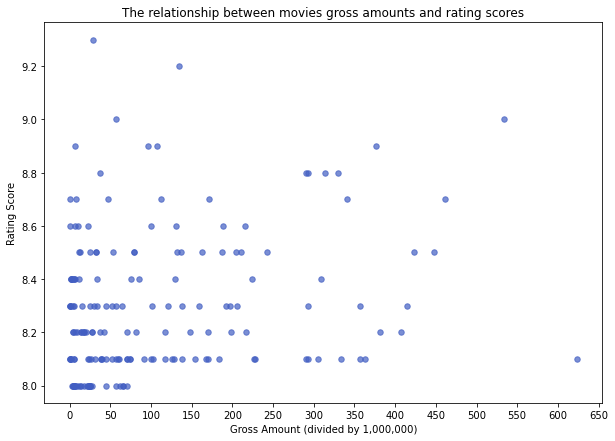

In [20]:
#Filtering data for rating scores and gross amounts to compare them directly
ratings = df['imdb_score']
gross_amount = df['gross']

#dividing gross amount by 1,000,000
gross_amount = gross_amount.apply(lambda val: val/1000000)      

#setting the figure size
plt.figure(figsize=(10, 7))    # figsize=(width,height) in inches

#Creating a scatterplot to compare gross amount to rating scores
plt.scatter(gross_amount, ratings,
            s=30,                   #specifying the size of the marker
            marker='o',             #specifying the shape of the marker 
            c='#425ec2',            #specifying the color of the marker
            alpha=0.70)             #specifying the degree of transparency 

#Adding title and axis labels
plt.title('The relationship between movies gross amounts and rating scores')
plt.xlabel('Gross Amount (divided by 1,000,000)')
plt.ylabel('Rating Score')

#adjusting the tick marks for the x-axis 
plt.xticks(range(0, 651, 50))

#Displaying the scatter plot
plt.show()


**1.2. Did this relationship change over time? Compare pre-2000 movies vs. post-2000 movies.**

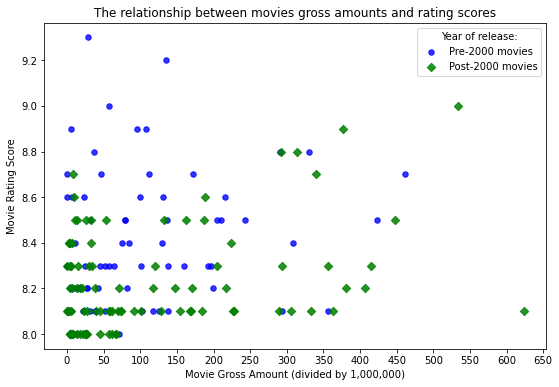

In [21]:
#Filtering data by year of release 
before2000_filter = df['title_year'] < 2000
after2000_filter = df['title_year'] >= 2000
df_pre2000 = df[before2000_filter]
df_post2000 = df[after2000_filter]

#setting the figure size
plt.figure(figsize=(9, 6))

#Creating a scatterplot for pre-2000 movies
plt.scatter(df_pre2000['gross'].apply(lambda val: val/1000000),
            df_pre2000['imdb_score'],
            label='Pre-2000 movies',
            s=30,
            marker='o',
            c='b',
            alpha=0.8)

#Creating a scatterplot for post-2000 movies
plt.scatter(df_post2000['gross'].apply(lambda val: val/1000000),
            df_post2000['imdb_score'],
            label='Post-2000 movies',
            s=35,
            marker='D',
            c='g',
            alpha=0.85)

#adjusting the tick marks for the x-axis 
plt.xticks(range(0, 651, 50))

#Adding title and axis labels
plt.title('The relationship between movies gross amounts and rating scores')
plt.xlabel('Movie Gross Amount (divided by 1,000,000)')
plt.ylabel('Movie Rating Score')
#Adding a legend
plt.legend(title='Year of release:', loc='best')
#Displaying the scatter plot
plt.show()


**2. Create a histogram that shows the rating score distribution vs. frequency of rating scores for R-Rated movies and PG-13 ones.**

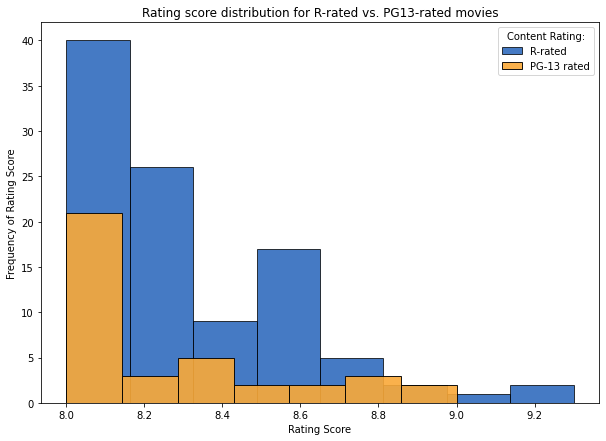

In [22]:
#Filtering the data by content rating 
r_rated_filter = df['content_rating'] == 'R'
pg13_rated_filter = df['content_rating'] == 'PG-13'
df_R = df[r_rated_filter]
df_PG13 = df[pg13_rated_filter]

#Setting the figure size
plt.figure(figsize=(10, 7))

#Creating a histogram to compare rating score distribution between R-rated and PG-13 rated movies
#Plotting R-rated movies 
plt.hist(df_R['imdb_score'],
         label='R-rated',
         color='#074eb0',
         alpha=0.75,
         linewidth=1, edgecolor='k',
         bins='auto')

#plotting PG-13 rated movies
plt.hist(df_PG13['imdb_score'],
         label='PG-13 rated',
         color='#faa938',
         alpha=0.9,
         linewidth=1, edgecolor='k',
         bins='auto')

#Adding titles and labels
plt.title('Rating score distribution for R-rated vs. PG13-rated movies')
plt.xlabel('Rating Score')
plt.ylabel('Frequency of Rating Score')
#Adding a legend
plt.legend(loc='best', title='Content Rating:')

#Displaying the histogram
plt.show()


In [23]:
#END